# 부동산 데이터 탐색
* 상업/업무용

In [217]:
import numpy as np
import pandas as pd
import os
import glob
import plotly

In [218]:
path = "Dataset/COMMERCE"
allFiles = glob.glob(os.path.join(path,"*.csv"))

In [219]:
allFiles

['Dataset/COMMERCE\\상업업무용(매매)-실거래가-201808.csv',
 'Dataset/COMMERCE\\상업업무용(매매)-실거래가-201809.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201512.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201601.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201602.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201603.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201604.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201605.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201606.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201607.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201608.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201609.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201610.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201611.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201612.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201701.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201702.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201703.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201704.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201705.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-20170

In [220]:
np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None,skiprows = 15, engine='python')
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
dataset = pd.DataFrame(comb_np_array)
dataset.columns = df.columns

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [221]:
dataset.columns

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도'],
      dtype='object')

In [222]:
dataset.columns = ["add_1", "type", "add_2","road_name", 
                   "use_district", "building_use", "road_condition", 
                   "GFA", "land_area", "price", "floor", 
                   "year_month", "day", "shares",
                   "built_year"]

In [223]:
dataset.shape # 관측치 : 257739, 항목 : 15

(257739, 15)

In [224]:
dataset.head()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,25m미만,596.76,307.40,"60,000",NaN,201808,11~20,,1989
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,12m미만,2524.75,590.80,"350,000",NaN,201808,1~10,,2003
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,12m미만,226.56,126.00,"22,000",NaN,201808,21~31,,1983
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,8m미만,20.64,84.00,"2,000",NaN,201808,11~20,,2015
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,8m미만,177.96,900.00,"19,600",NaN,201808,11~20,,2002


In [225]:
dataset.tail()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
257734,충청북도 충주시 용산동,일반,2**,용산로,제2종일반주거,제1종근린생활,25m미만,122.32,126.00,"17,000",NaN,201807,11~20,,1974
257735,충청북도 충주시 용산동,일반,1***,남산1길,자연녹지,제2종근린생활,8m미만,22.44,274.33,"3,300",NaN,201807,21~31,,1991
257736,충청북도 충주시 주덕읍 신양리,일반,2**,시장길,일반상업,제2종근린생활,12m미만,151.47,107.00,"13,000",NaN,201807,11~20,,1988
257737,충청북도 충주시 충의동,일반,2*,충인8길,일반상업,제1종근린생활,8m미만,430.61,268.00,"20,000",NaN,201807,21~31,,1980
257738,충청북도 충주시 칠금동,일반,8**,계명대로,준주거,제1종근린생활,25m이상,1376.1,313.10,"247,000",NaN,201807,11~20,,2008


In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null object
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null object
building_use      257739 non-null object
road_condition    257739 non-null object
GFA               257739 non-null object
land_area         257739 non-null object
price             257739 non-null object
floor             118494 non-null object
year_month        257739 non-null object
day               257739 non-null object
shares            257739 non-null object
built_year        253478 non-null object
dtypes: object(15)
memory usage: 29.5+ MB


In [227]:
dataset.dtypes

add_1             object
type              object
add_2             object
road_name         object
use_district      object
building_use      object
road_condition    object
GFA               object
land_area         object
price             object
floor             object
year_month        object
day               object
shares            object
built_year        object
dtype: object

In [228]:
#Edit GFA datatype
dataset['GFA']=dataset['GFA'].astype('float')

In [229]:
dataset['GFA'].describe()

count    257739.000000
mean        219.341199
std        1157.313622
min           0.040000
25%          27.630000
50%          65.760000
75%         175.065000
max      259730.850000
Name: GFA, dtype: float64

In [230]:
#Edit price type
dataset['price']=dataset['price'].str.replace(",","").astype('int64')

In [231]:
dataset['price'].describe()

count    2.577390e+05
mean     6.497444e+04
std      4.875732e+05
min      1.010000e+02
25%      8.800000e+03
50%      2.250000e+04
75%      5.200000e+04
max      8.932397e+07
Name: price, dtype: float64

In [246]:
#Edit land_area type
print(dataset['land_area'].describe())
dataset['land_area']=dataset['land_area'].astype('float')

count     257739
unique     13342
top             
freq      181002
Name: land_area, dtype: object


ValueError: could not convert string to float: 

In [ ]:
pd.value_counts(dataset['land_area'].values, sort=True, ascending=True)

In [ ]:
#Edit built_year type
dataset['built_year']=dataset['built_year'].astype('float')

In [ ]:
dataset['built_year'].describe()

In [ ]:
pd.value_counts(dataset['built_year'].values, sort=False, ascending=False)

In [ ]:
print(dataset['built_year'].eq(0).sum())
print(dataset['price'].eq(0).sum())
print(dataset['GFA'].eq(0).sum())
print(dataset['floor'].eq("").sum())

In [233]:
#Edit Road_condition type

c = {'8m미만':1,'12m미만':2,'25m미만':3,'25m이상':4}
dataset['road_condition'] = dataset['road_condition'].replace(c)

dataset['road_condition']=dataset['road_condition'].astype('category')


In [234]:
#Edit Year_month type
dataset['year_month']=dataset['year_month'].astype('int64')
print([dataset['year_month'].describe()])

[count    257739.000000
mean     201684.701264
std          82.230377
min      201512.000000
25%      201607.000000
50%      201704.000000
75%      201712.000000
max      201809.000000
Name: year_month, dtype: float64]


In [235]:
#Edit Day. type
dataset['day'].value_counts()
#83743+80895+57010+29138+4171+2782=257739

11~20    83743
1~10     80895
21~31    57010
21~30    29138
21~28     4171
21~29     2782
Name: day, dtype: int64

In [236]:
''' 
Change type 'contractD' as categorical type --> 월별로 범위가 달라서 categorical 형태를 무리
--> '1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3로 형태 바꾸기
'''
d = {'1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3}
dataset['day'] = dataset['day'].replace(d)

In [237]:
print(dataset['day'].value_counts()) 
#93101+83743+80895=257739
dataset['day']=dataset['day'].astype('category')
print(dataset['day'].astype('category').describe())

3    93101
2    83743
1    80895
Name: day, dtype: int64
count     257739
unique         3
top            3
freq       93101
Name: day, dtype: int64


In [238]:
#Edit floor - ... How to deal 'NaN'
print(pd.value_counts(dataset['floor'].values))
print(dataset['floor'])

 1.0     39991
 2.0     22702
 3.0     13589
 4.0      8965
 5.0      7082
 6.0      5125
 7.0      3818
 8.0      2642
-1.0      1865
 10.0     1713
 9.0      1607
 11.0     1007
 12.0      665
 13.0      641
 20.0      636
 14.0      594
 15.0      487
 30.0      482
 26.0      361
 16.0      309
 17.0      278
 27.0      254
 22.0      248
 21.0      246
 23.0      222
 70.0      219
 31.0      204
 40.0      183
 18.0      176
 24.0      171
         ...  
 46.0       23
 63.0       22
 35.0       21
 47.0       17
 59.0       17
 64.0       17
 53.0       17
 68.0       15
 74.0       15
 39.0       14
 67.0       13
 52.0       12
 65.0       11
 73.0       11
 36.0       10
 49.0       10
 48.0        9
 69.0        7
 81.0        7
 82.0        6
 91.0        6
-5.0         4
 54.0        3
 57.0        2
 55.0        2
 83.0        2
 56.0        1
 77.0        1
 92.0        1
 58.0        1
Length: 86, dtype: int64
0         NaN
1         NaN
2         NaN
3         NaN
4   

In [239]:
dataset['floor'].describe()

count     118494.0
unique        86.0
top            1.0
freq       39991.0
Name: floor, dtype: float64

In [240]:
#After Editing Data Type
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null object
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null object
building_use      257739 non-null object
road_condition    257739 non-null category
GFA               257739 non-null float64
land_area         257739 non-null object
price             257739 non-null int64
floor             118494 non-null object
year_month        257739 non-null int64
day               257739 non-null category
shares            257739 non-null object
built_year        253478 non-null object
dtypes: category(2), float64(1), int64(2), object(10)
memory usage: 26.1+ MB
After Data type : 
None


In [241]:
#!pip install missingno

In [242]:
#Edit Shares
#NaN값은 0.0으로 설정 
'''
How to process observations without values?

option 1. Remove the observations with Null value
option 2. Delete the entire feature
option 3. Fill with some value(0,mean,median ...)

'''
dataset.loc[dataset['shares'].isnull(),'shares'] = 0.0
dataset.loc[dataset['floor'].isnull(),'floor'] = ''
dataset.loc[dataset['built_year'].isnull(),'built_year'] = 0.0
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [243]:
#  NaN ratio  -> use option 1 ...? 4261...

dataset = dataset.dropna(axis=0)
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



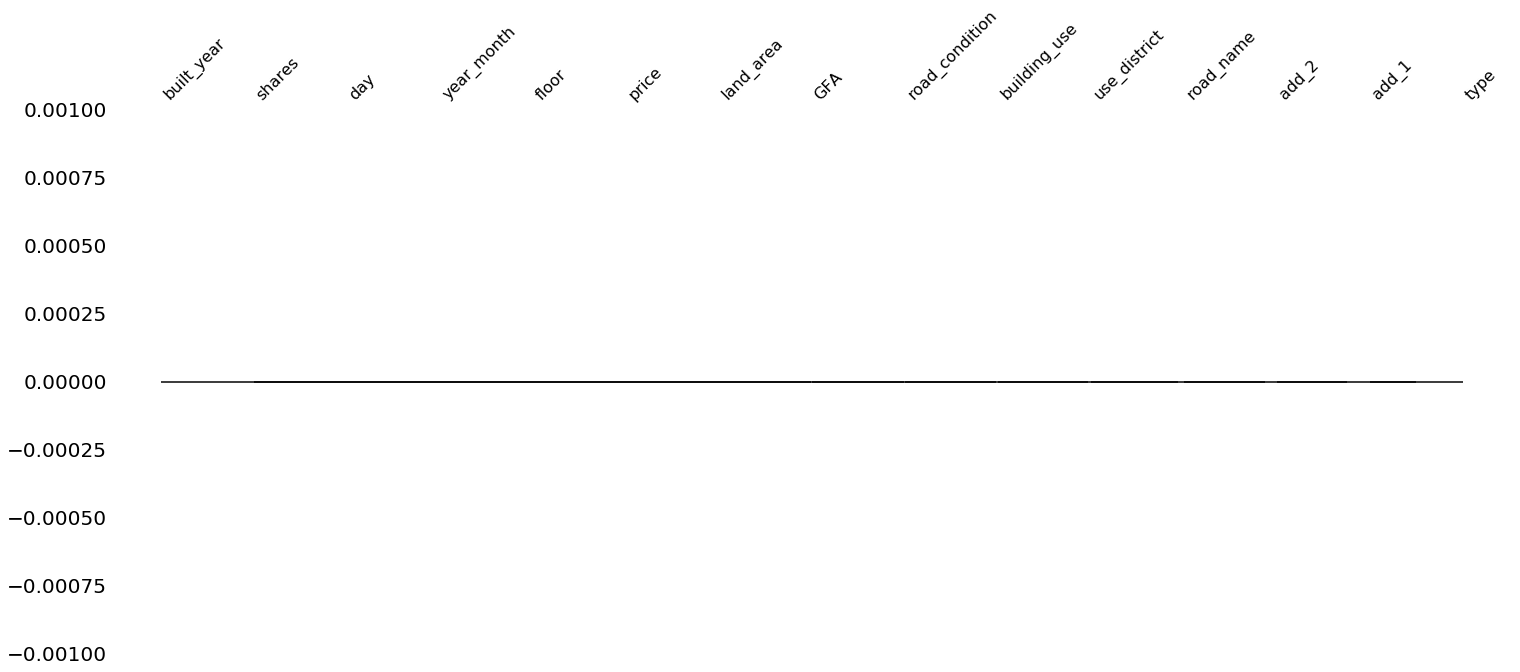

In [244]:
missingno.dendrogram(dataset)

In [247]:
dataset

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,3,596.76,307.40,60000,,201808,2,,1989
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,2,2524.75,590.80,350000,,201808,1,,2003
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,2,226.56,126.00,22000,,201808,3,,1983
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,1,20.64,84.00,2000,,201808,2,,2015
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,1,177.96,900.00,19600,,201808,2,,2002
5,강원도 강릉시 노암동,일반,8**,노암길42번길,제1종일반주거,제2종근린생활,2,252.73,211.30,21000,,201808,1,,1995
6,강원도 강릉시 병산동,일반,2**,성덕로,자연녹지,제2종근린생활,4,699.84,947.00,52000,,201808,3,,2006
7,강원도 강릉시 사천면 사천진리,일반,2**,해안로,제2종일반주거,제2종근린생활,1,270.00,1887.00,157000,,201808,1,,2003
8,강원도 강릉시 성남동,일반,9*,금성로35번길,일반상업,제2종근린생활,1,85.62,123.00,17000,,201808,3,,1952
9,강원도 강릉시 옥천동,일반,1**,옥가로7번길,일반상업,제2종근린생활,2,162.68,61.80,20500,,201808,2,,1989


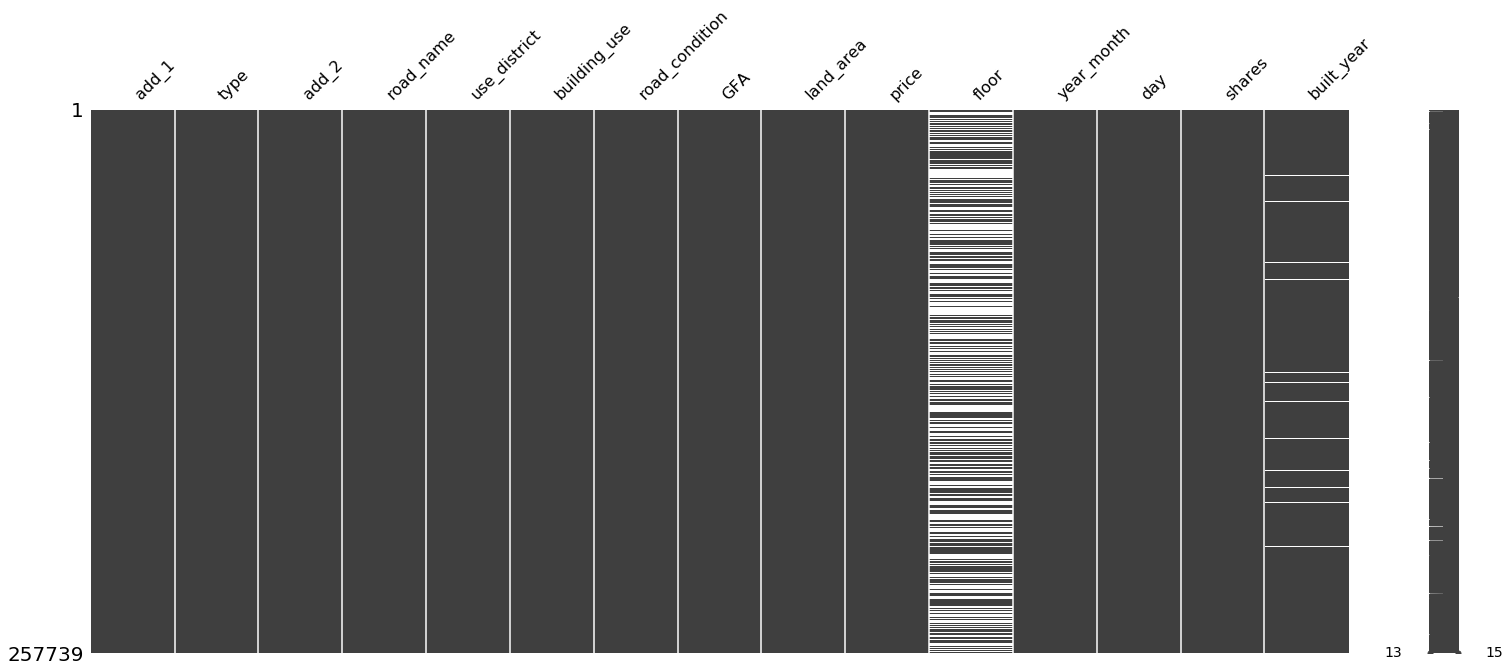

In [63]:
#!pip install missingno
import missingno 
import matplotlib
%matplotlib inline

missingno.matrix(dataset)

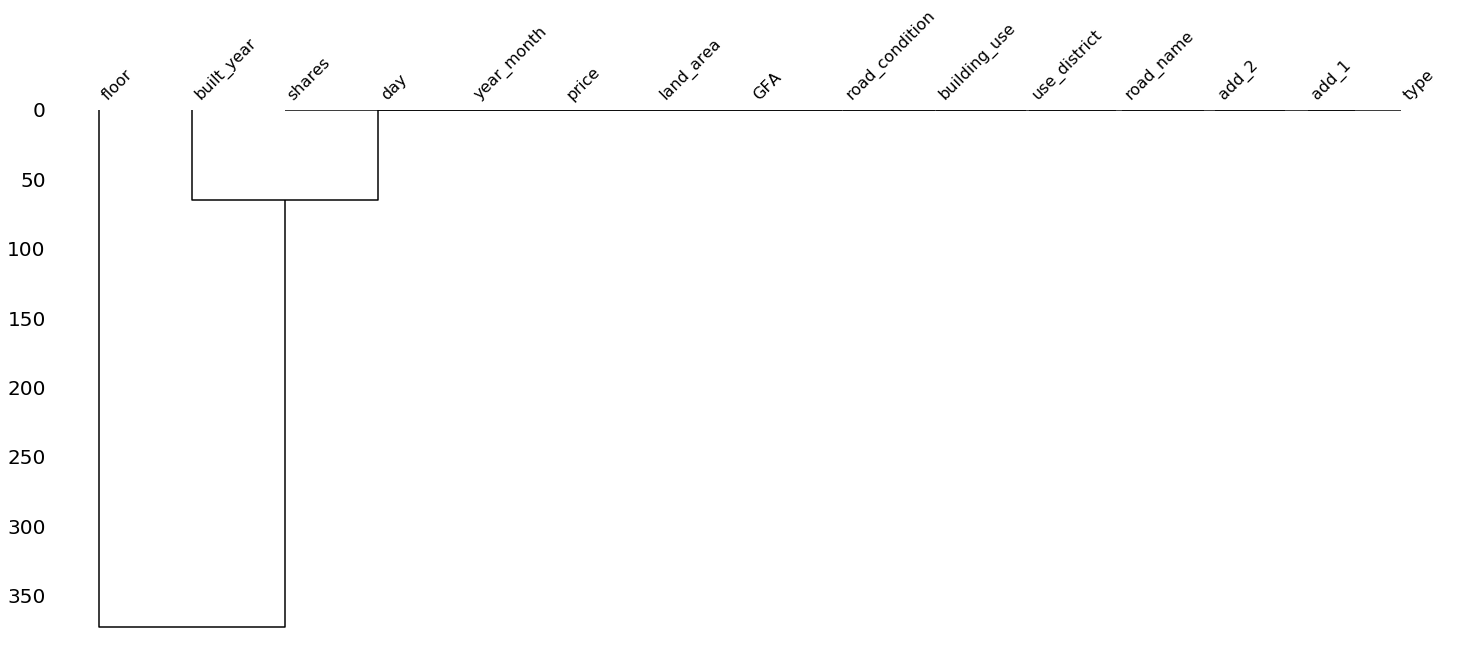

In [91]:
missingno.dendrogram(dataset)

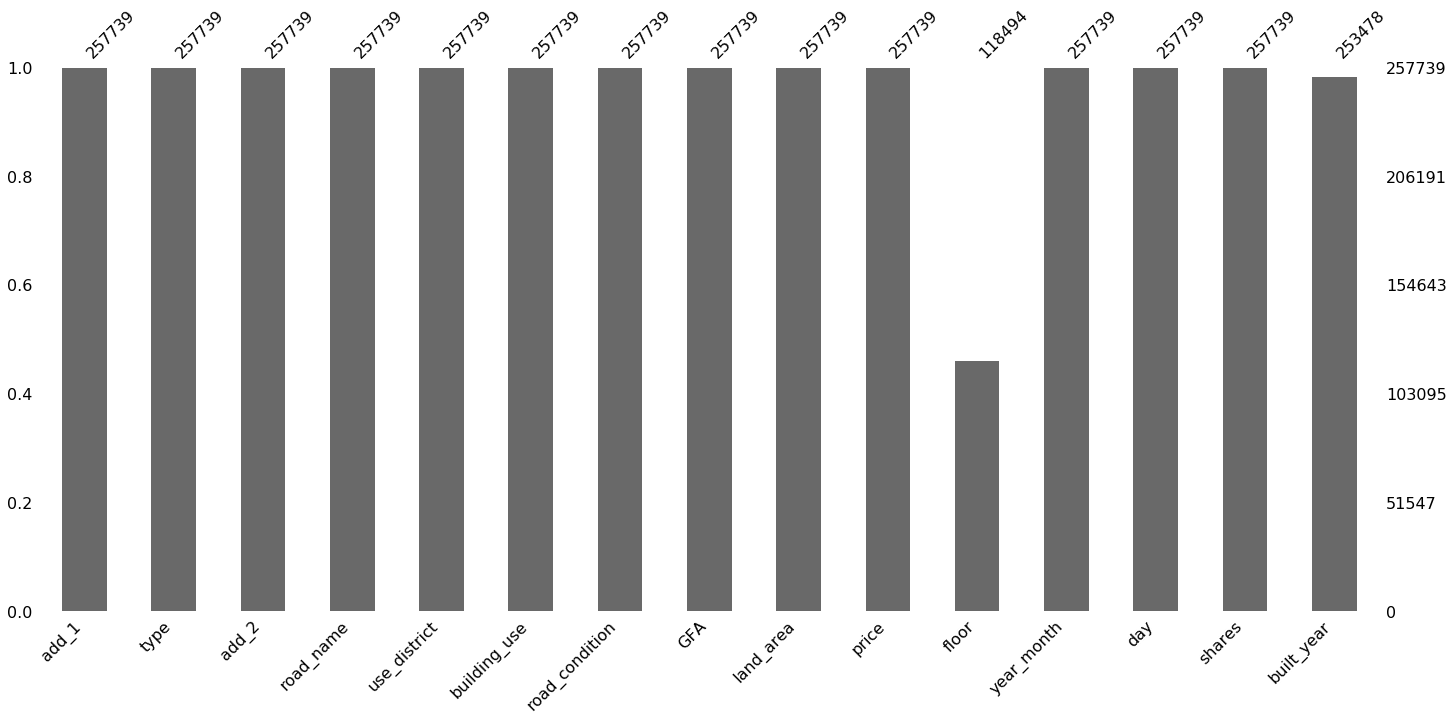

In [90]:
missingno.bar(dataset)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Size of Graph
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [78]:
plt.show()

ValueError: Must pass DataFrame with boolean values only

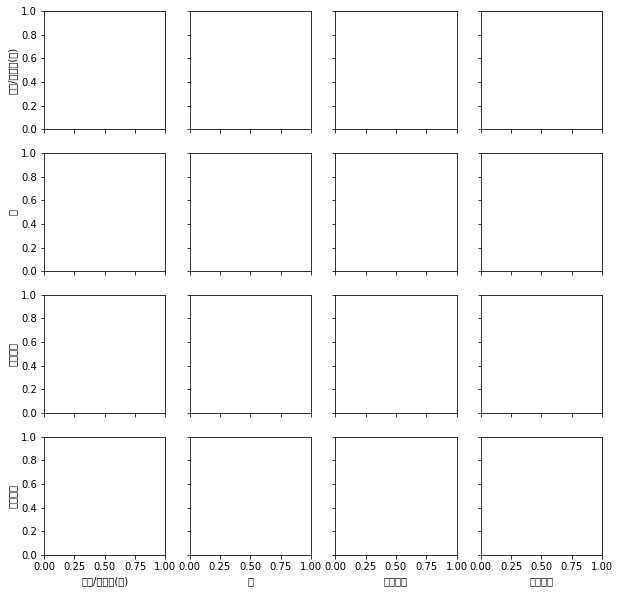

In [89]:
sns.pairplot(df, hue=dataset);
plt.show()

In [41]:
dataset.describe()

,GFA,price,built_year
count,257739.000000,2.577390e+05,253478.000000
mean,219.341199,6.497444e+04,2000.991021
std,1157.313622,4.875732e+05,23.326165
min,0.040000,1.010000e+02,0.000000
25%,27.630000,8.800000e+03,1994.000000
50%,65.760000,2.250000e+04,2003.000000
75%,175.065000,5.200000e+04,2010.000000
max,259730.850000,8.932397e+07,2018.000000


In [ ]:
#지도학습 1) 가격맞추기 2)분류하기 (y=use)
#비지도학습 1) 위치 좌표 나타내기 2) 군집화 